# Lab Week 6

## EOSC 211

### Learning Objectives:

1. develop algorithms involving loops.
2. carry out a top-down design process.
3. modularize code, separating the algorithm from input/output statements.
4. solve a problem useful in the earth sciences

In [1]:
from e211_lib import e211
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load data 
# note: time vectors are in some strange format and need to be fixed (AL)

# aircraft velocity time series
vel, fly_time = e211.load_aircraft("aircraft_gps.mat")

# sand heads temperature time series
temp, sand_time = e211.load_temps("sand_heads.mat")

### Intro

In this lab, we will be working with *time series data*, and apply our skills programming with loops to create a series of *filters*, which remove unwanted or erroneous features in our data. Time series are one of the most common types of data sets we expect to encounter, so we would like our filtering algorithm to work for not just one particular dataset, but *any* time series that can be read as a numpy array.

In the very first lab you plotted a long sequence (a time series) of temperatures at Sand Heads.  Remember that the data showed a broad seasonal trend (colder in winter, warmer in summer), but that at very short time scales (a day or two) there was a great deal of variability which gave the curve a fuzzy look when you plotted a whole year.  It is often very useful to be able to *smooth* a time series to better display broad trends by averaging away the short-time variability. A very simple way of smoothing a time series is to use a *running mean*. Imagine that $N$ data points are recorded hourly, and number them 1,2,3,. . .,$i$−1, $i$, $i$ + 1,. . .,$N$ as they appear in an array.If we are calculating a 5 point running mean, then the 5th point in the *smoothed* time series will be the average of points 3, 4, 5, 6 and 7 from the original time series (from “two-to-the-left” to “two-to-the-right”).  The 6th point in the smoothed time series will be the average of points 4, 5, 6, 7,and 8 from the original time series. The 7th point will be the average of points 5, 6, 7, 8, and 9. And so on, moving over one point each time, with your window *running* through the time series, calculating the average of the points in the window at each point in the original series (Fig. 2).

<img src="runningmean.png" width="300">
<p style="text-align: center;">Fig 2: An example of the 5 point running mean. The $i$th element of $z$ will be 9.2, an average of 1, 12, 21, 7, and 5. The next element will be 9.4, an average of 12, 21, 7, 5, and 2, and so on.</p>


How de we describe this mathematically? Formally, we start with a time series vector $x$, whose $i$th element is $x_i$ where $i= 1. . . N$.  Then we form a new time series $z$, again with $N$ elements, for which the $i$th point $z_i$ is an average of points in $x$ within the window. If the window has a length of 5, then:

$$
z_i = \frac{x_{i-2} + x_{i-1} + x_{i} + x_{i+1} + x_{i+2}}{5}\tag{1}
$$

$$
z_i = \frac{1}{5}\sum_{k=-2}^2 x_{i+k}\tag{2}
$$

and if it has a length $L$ (which has to be an odd number) then it would be:

$$
z_i = \frac{1}{L}\sum_{k=-W}^Wx_{i+k}\tag{3}
$$
where
$$
W = \frac{L-1}{2}\tag{4}
$$

## Part 1 - Creating a Running Mean Algorithm Using `for` Loops

Your task is to implement these equations in Python and use them to filter the time series data provided. We would like our code to be re-useable and somewhat flexible, so we don’t just program the long sum of 5 points in eqn. (1), because we may want to change the length of the window later on - we want $L$ as another input parameter. This is because we might want a 3 point running mean, or a 9 point running mean. Instead, in this lab, you will use loops to program eqn. (3). To write the required code, we will break the problem down into a series of steps, which you will follow as you go through the lab:

>1) First, develop a basic algorithm, using a `for` loop to run through each element $x_i$ in the series (This can be done correctly in a few different ways). For now, just print $x_i$ to the screen, or perform some other very simple operation inside the loop. 

>2) Inside the first loop, replace your very simple operation with another `for` loop which calculates the mean centered around the point $x_i$ (i.e. implement equation 2 in code). You will need to specify a window length $L$, which needs to be an **odd number**. If we are going to take $L$ as a user-specified variable, what could you do to ensure that the $L$ used in your algorithm is indeed an odd number? (Multiple correct approaches) 
>>*Note: Numpy has a built-in function `np.mean()` for calculating the mean of an array, but don't use it here. The point of this lab is to practice with loops. DIY*

>3) Next, add some `if` statements to handle the awkward cases that take place at the start and end of the loop. (Again, multiple correct approaches, although some are better than others)

>5) In order to make really sure you have implemented the algorithm correctly, test it on some data for which you can work out the answer. For example, set `x=[1 5 3 7 9 8 4 6]`, `winlen=3` Work out BY HAND what the answer should be, and then see if your program replicates this. Try different window lengths and see what happens.

>4) Apply your filtering algorithm to each of the datasets provided and display the results with a scientific figure. Show on your plot both the raw and filtered data, and include a legend showing which is which.

In [3]:
# your code here

## Part 2 - The Running Median and `while` Loops

In this section, your task is to add to/modify your code to calculate the *running median* for a given window size. Why would you use a running median instead of a running mean? In the case of the temperature data most (or all) of the data is correct, or at least not wildly and obviously wrong. This is generally untypical of "real" data, which often show very intermittent obviously erroneous measurements for various reasons. The aircraft dataset contains such errors. We know that the speed of a plane tends to vary smoothly between something like 30 to 50 m/s, but there are strange spikes in the series (especially inthe middle part of the time series when the plane is turning a lot), related to changes in the paths of radio-wave propagation when the aircraft changes its orientation and certain parts of the sky are obscured. These are clearly “bad data” because the speed of anything real won’t change by 20 m/s for only one second (the airplane's wings would fall off from the violent acceleration). Now, if  we  were  interested  in  the  speed,  taking  a  running  average  will  not  really  help  matters because it tends to pull the smooth curve away from the “correct” points.   But  a  running  median,  if  the  window  is  long  enough,  can  reject  these outliers. 

A running median works much like a running mean, except that inside the window, we calculate the median of a dataset instead of the average. For a refresher on *central tendencies of a dataset*, click [here](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/mean-median-basics/a/mean-median-and-mode-review). To calculate the median of a dataset:

>1) Start with all a list of numbers, which in this case is all the numbers currently inside the window. 

>2) Using a `while` loop, eliminate both the hightest and lowest numbers from your current window until you are left with only one number -- the *median*. (You need an window of odd length for this to work)

>3) Once your window only contains one number, stop eliminating the min and max, and extract the number from your dataset and save it to the $i$th element of your filtered array

>4) Move the window over and repeat

> 5) Test your algorithm the same way you did with the running mean (do it by hand on a small dataset). When working properly the spikes will be removed from the aircraft time series with a window length of 7.

### To hand in:

Combine your code from parts 1 and 2 to create a *scientific figure* which displays:

A) The raw aircraft velocity data

B) The data filtered by your running mean algorithm with a window length of 7

C) The data filtered by your running median algorithm, also with a window length of 7

Your code should follow our standard *input/import, process, display* structure, and include lots of commenting to show what is happening where. In a *markdown* cell below your figure, explain which algorithm is more effective at filtering erroneous measurements out of the dataset.

In [4]:
# your code here

In [5]:
# andrew's soln

winlen = 7  # L from equation 3
window_ind = int((winlen - 1) / 2)  # equation 4

# discuss this vs the np.append() approach
z = np.zeros_like(vel)
zm = np.zeros_like(vel)
# y = np.zeros_like(vel)
# ym = np.zeros_like(vel)

# the crux here is remembering that range(a,b) and/or [a:b] are INCLUSIVE of a and EXCLUSIVE of b
# not recoginizing this will give you the wrong answer
for i in range(
    window_ind, len(vel) - window_ind):  # deal with the edges by ignoring them
    # mean
    for k in range(i - window_ind, i + window_ind + 1):
        z[i] += vel[k] / winlen  # eqn 2

    # median
    window = list(vel[i - window_ind : i + window_ind + 1])
    while len(window) > 1:
        window.remove(max(window))
        window.remove(min(window))
    zm[i] = window[0]

    # the numpy functions do it faster -- more on this in later labs
    # y[i] = np.mean(vel[i - window_ind : i + window_ind + 1])
    # ym[i] = np.median(vel[i - window_ind : i + window_ind + 1])

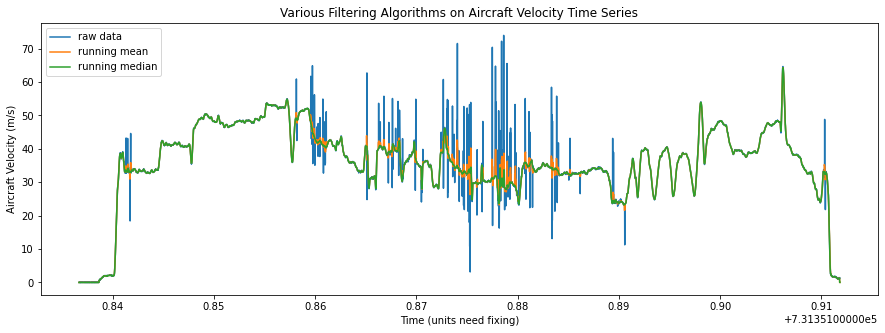

In [6]:
# output comparing the raw data and two smoothing techniques
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(fly_time, vel, label="raw data")
ax.plot(fly_time, z, label="running mean")
ax.plot(fly_time, zm, label="running median")
ax.set_xlabel("Time (units need fixing)")
ax.set_ylabel("Aircraft Velocity (m/s)")
ax.set_title("Various Filtering Algorithms on Aircraft Velocity Time Series")
ax.legend();

The running mean does a reasonably good job of smoothing out the data, but still includes data from the "spikes" (it just makes the spikes smaller). The running median ignores the spikes entirely, as medians are less sensitive to outlier data. 

An even better approach would be to detect areas of the data where the plane's accelerations are beyond some threshhold value and eliminate the "spikes" completely from the dataset, *then* apply the running mean or median algorithms.